# Objectifs

1. Récupération et exploration du dataset `digits` de scikit-learn
2. Entrainement de modèles de classification sur ce dataset
3. Exploration des différents types de métriques pour la crossvalidation

# Dataset

In [1]:
from sklearn.datasets import load_digits 

In [2]:
ds = load_digits()

In [3]:
print(ds.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [4]:
X, y = ds.data, ds.target
X.shape

(1797, 64)

**Exercice** Coder une fonction permettant de visualiser l'image correspondant à une ligne donnée.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
plt.matshow?

Signature: plt.matshow(A, fignum=None, **kwargs)
Docstring:
Display an array as a matrix in a new figure window.

The origin is set at the upper left hand corner and rows (first
dimension of the array) are displayed horizontally.  The aspect
ratio of the figure window is that of the array, unless this would
make an excessively short or narrow figure.

Tick labels for the xaxis are placed on top.

Parameters
----------
A : 2D array-like
    The matrix to be displayed.

fignum : None or int or False
    If *None*, create a new figure window with automatic numbering.

    If a nonzero integer, draw into the figure with the given number
    (create it if it does not exist).

    If 0, use the current axes (or create one if it does not exist).

    .. note::

       Because of how `.Axes.matshow` tries to set the figure aspect
       ratio to be the one of the array, strange things may happen if you
       reuse an existing figure.

Returns
-------
`~matplotlib.image.AxesImage`

Other Param

In [9]:
t = np.arange(16)
t

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [10]:
t.reshape((4, 4))

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [26]:
def visualisation_digits(i: int, taille=4):
    
    fig, reps = plt.subplots(ncols=taille, nrows=taille)
    for j, rep in enumerate(reps.flatten()):
        image = 15 - X[i+j].reshape((8, 8))
        rep.matshow(image, cmap="gray")
        rep.set_title(f"chiffre: {y[i+j]}")
        rep.set_xticks([])
        rep.set_yticks([])
    return fig

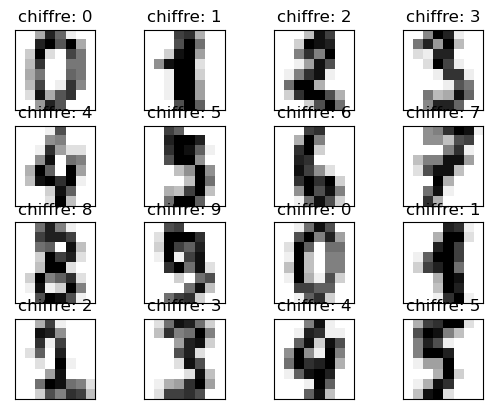

In [27]:
visualisation_digits(0);

**Exercice** On aurait pu faire une variante aléatoire pour estimer la difficulté de la tâche pour des humains!

# Entrainement

Modèles:
- K-voisins
- Bayesien naifs
- Regression logistique
- support vecteurs
- Forêt aléatoire
- Réseau de neurones

In [29]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import minmax_scale

In [30]:
# mise à l'échelle pour svm et mlp
X_scale = minmax_scale(X)

In [31]:
X.min(), X.max()

(0.0, 16.0)

In [32]:
X_scale.min(), X_scale.max()

(0.0, 1.0)

In [35]:
# train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(X_scale, y)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [37]:
voisins_gs = GridSearchCV(
    KNeighborsClassifier(),
    {
        "n_neighbors": range(2, 15),
        "weights": ("uniform", "distance"),
    }
)

In [39]:
%%time
voisins_gs.fit(X_tr, y_tr)

CPU times: total: 46.1 s
Wall time: 4.46 s


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(2, 15),
                         'weights': ('uniform', 'distance')})

In [40]:
voisins_gs.best_params_, voisins_gs.best_score_

({'n_neighbors': 2, 'weights': 'distance'}, 0.9881206113176374)

In [43]:
naive_gs = GridSearchCV(
    BernoulliNB(),
    {
        "alpha": np.linspace(0.01, 1, 10),
    }
)

In [44]:
%%time
naive_gs.fit(X_tr, y_tr)

GridSearchCV(estimator=BernoulliNB(),
             param_grid={'alpha': array([0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 1.  ])})

In [45]:
naive_gs.best_params_, naive_gs.best_score_

({'alpha': 0.01}, 0.8463444857496902)

In [56]:
log_gs = GridSearchCV(
    LogisticRegression(),
    [
        {
           "penalty" : ['l1', 'elasticnet'],
            "C": [0.1, 0.5, 1.0, 5.0, 10.0],
            "max_iter": [500,],
            "solver": ["saga",],
        },
        {
            "penalty": ["l2"],
            "C": [0.1, 0.5, 1.0, 5.0, 10.0],
            "max_iter": [500,],
        },
        {
            "penalty": ["none"],
        },
    ]
)

In [57]:
%%time
log_gs.fit(X_tr, y_tr)

C:\Users\perrollaz\.conda\envs\maj\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\perrollaz\.conda\envs\maj\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\perrollaz\.conda\envs\maj\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\perrollaz\.conda\envs\maj\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\perrollaz\.conda\envs\maj\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\perrollaz\.conda\envs\maj\lib\site-packages\sklearn

GridSearchCV(estimator=LogisticRegression(),
             param_grid=[{'C': [0.1, 0.5, 1.0, 5.0, 10.0], 'max_iter': [500],
                          'penalty': ['l1', 'elasticnet'], 'solver': ['saga']},
                         {'C': [0.1, 0.5, 1.0, 5.0, 10.0], 'max_iter': [500],
                          'penalty': ['l2']},
                         {'penalty': ['none']}])

In [58]:
log_gs.best_params_, log_gs.best_score_

({'C': 5.0, 'max_iter': 500, 'penalty': 'l2'}, 0.9658625912157511)

In [63]:
svm_gs = GridSearchCV(
    SVC(),
    {
        "C": [0.1, 0.5, 1.0, 5.0, 10.0, 20.0, 30.0],
    }
)
        
        

In [64]:
%%time
svm_gs.fit(X_tr, y_tr)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 0.5, 1.0, 5.0, 10.0, 20.0, 30.0]})

In [65]:
svm_gs.best_params_, svm_gs.best_score_

({'C': 10.0}, 0.9873826242599477)

In [66]:
foret_gs = GridSearchCV(
    RandomForestClassifier(),
    {
        "n_estimators": range(10, 200, 10),
    }
)

In [67]:
%%time
foret_gs.fit(X_tr, y_tr)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': range(10, 200, 10)})

In [68]:
foret_gs.best_params_, foret_gs.best_score_

({'n_estimators': 150}, 0.9732920280875671)

In [69]:
neurones_gs = GridSearchCV(
    MLPClassifier(),
    {
        "hidden_layer_sizes": [(10,), (50,), (100,), (10, 10,)],
        "activation": ['logistic', 'tanh', 'relu'],
        "alpha": 10.0 ** -np.arange(1, 7)
    }
)

In [70]:
%%time
neurones_gs.fit(X_tr, y_tr)

C:\Users\perrollaz\.conda\envs\maj\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\perrollaz\.conda\envs\maj\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\perrollaz\.conda\envs\maj\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\perrollaz\.conda\envs\maj\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\perrollaz\.conda\envs\m

CPU times: total: 20min 55s
Wall time: 3min 29s


C:\Users\perrollaz\.conda\envs\maj\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(estimator=MLPClassifier(),
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
                         'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06]),
                         'hidden_layer_sizes': [(10,), (50,), (100,),
                                                (10, 10)]})

In [71]:
neurones_gs.best_params_, neurones_gs.best_score_

({'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,)},
 0.9777392262150626)

# Exploration des métriques alternatives

In [72]:
from sklearn.metrics import (
    confusion_matrix, 
    accuracy_score, 
    precision_score, 
    recall_score
)

**Exercice** Entrainer le meilleur modèle sur l'ensemble du dataset d'entrainement.
Puis générer ses matrices de confusions sur les deux parties du dataset.

In [73]:
meilleur = KNeighborsClassifier(n_neighbors=2, weights="distance")

In [74]:
meilleur.fit(X_tr, y_tr)

KNeighborsClassifier(n_neighbors=2, weights='distance')

In [75]:
Mc_tr = confusion_matrix(y_tr, meilleur.predict(X_tr))
Mc_te = confusion_matrix(y_te, meilleur.predict(X_te))

Text(0.5, 1.0, 'Test')

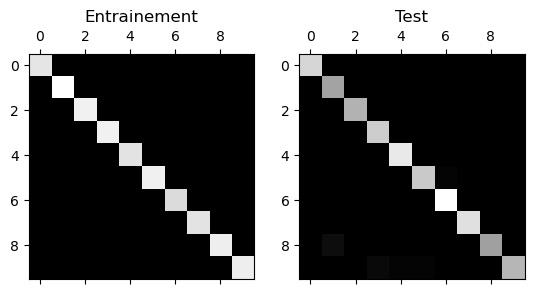

In [78]:
fig, (repg, repd) = plt.subplots(ncols=2)
repg.matshow(Mc_tr, cmap="gray")
repg.set_title("Entrainement")
repd.matshow(Mc_te, cmap="gray")
repd.set_title("Test")

In [79]:
Mc_tr

array([[131,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 146,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 138,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 138,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 130,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 137,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 125,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 130,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 136,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 136]], dtype=int64)

In [80]:
Mc_te

array([[47,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 36,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 39,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 45,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 51,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 44,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 56,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 49,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  0, 35,  0],
       [ 0,  0,  0,  2,  1,  1,  0,  0,  0, 40]], dtype=int64)

In [82]:
accuracy_score(y_te, meilleur.predict(X_te))

0.9822222222222222

In [84]:
precision_score(
    y_te, 
    meilleur.predict(X_te), 
    average="macro",
)

0.9821526880485447

In [85]:
recall_score(
    y_te, 
    meilleur.predict(X_te), 
    average="macro",
)

0.9807921318447633

**TODO** ajouter graphique pour les champignons! et lien vers l'article correspondant!

**Exercice** Reprendre la sélection par cross-validation pour utiliser `precision_score` dans la sélection plutôt que `accuracy_score`.